In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = pd.read_csv(r"D:\Data_porfolio\Python\Sales analysis and prediction\Walmart DataSet.csv")
data

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010    1643690.90             0        42.31       2.572   
1         1  12-02-2010    1641957.44             1        38.51       2.548   
2         1  19-02-2010    1611968.17             0        39.93       2.514   
3         1  26-02-2010    1409727.59             0        46.63       2.561   
4         1  05-03-2010    1554806.68             0        46.50       2.625   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012     713173.95             0        64.88       3.997   
6431     45  05-10-2012     733455.07             0        64.89       3.985   
6432     45  12-10-2012     734464.36             0        54.47       4.000   
6433     45  19-10-2012     718125.53             0        56.47       3.969   
6434     45  26-10-2012     760281.43             0        58.85       3.882   

             CPI  Unemployment  
0     211.096358         8.106  
1     211.242170         8.106  
2     211.289143         8.106  
3     211.319643         8.106  
4     211.350143         8.106  
...          ...           ...  
6430  192.013558         8.684  
6431  192.170412         8.667  
6432  192.327265         8.667  
6433  192.330854         8.667  
6434  192.308899         8.667  

[6435 rows x 8 columns]

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [43]:
#changing date column to date type
data['Date'] = pd.to_datetime(data['Date'], dayfirst = True)
data.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [44]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [45]:
data.duplicated().sum()

0

In [46]:
#no. of stores
data['Store'].nunique()

45

In [47]:
#no. of evaluation week for each store
data['Date'].nunique()

143

In [48]:
#checking for outliers
ncols = 3
nrows = (len(data.select_dtypes(include=[np.number]).columns)-1) // ncols + 1
fig, axs = plt.subplots(nrows, ncols, figsize = (20,20))
for i,cols in enumerate(data.select_dtypes(include=[np.number]).columns):
    row_id = i // ncols
    col_id = i % ncols
    sns.boxplot(data[cols], ax = axs[row_id][col_id])
    axs[row_id][col_id].set_title(cols)
plt.show()

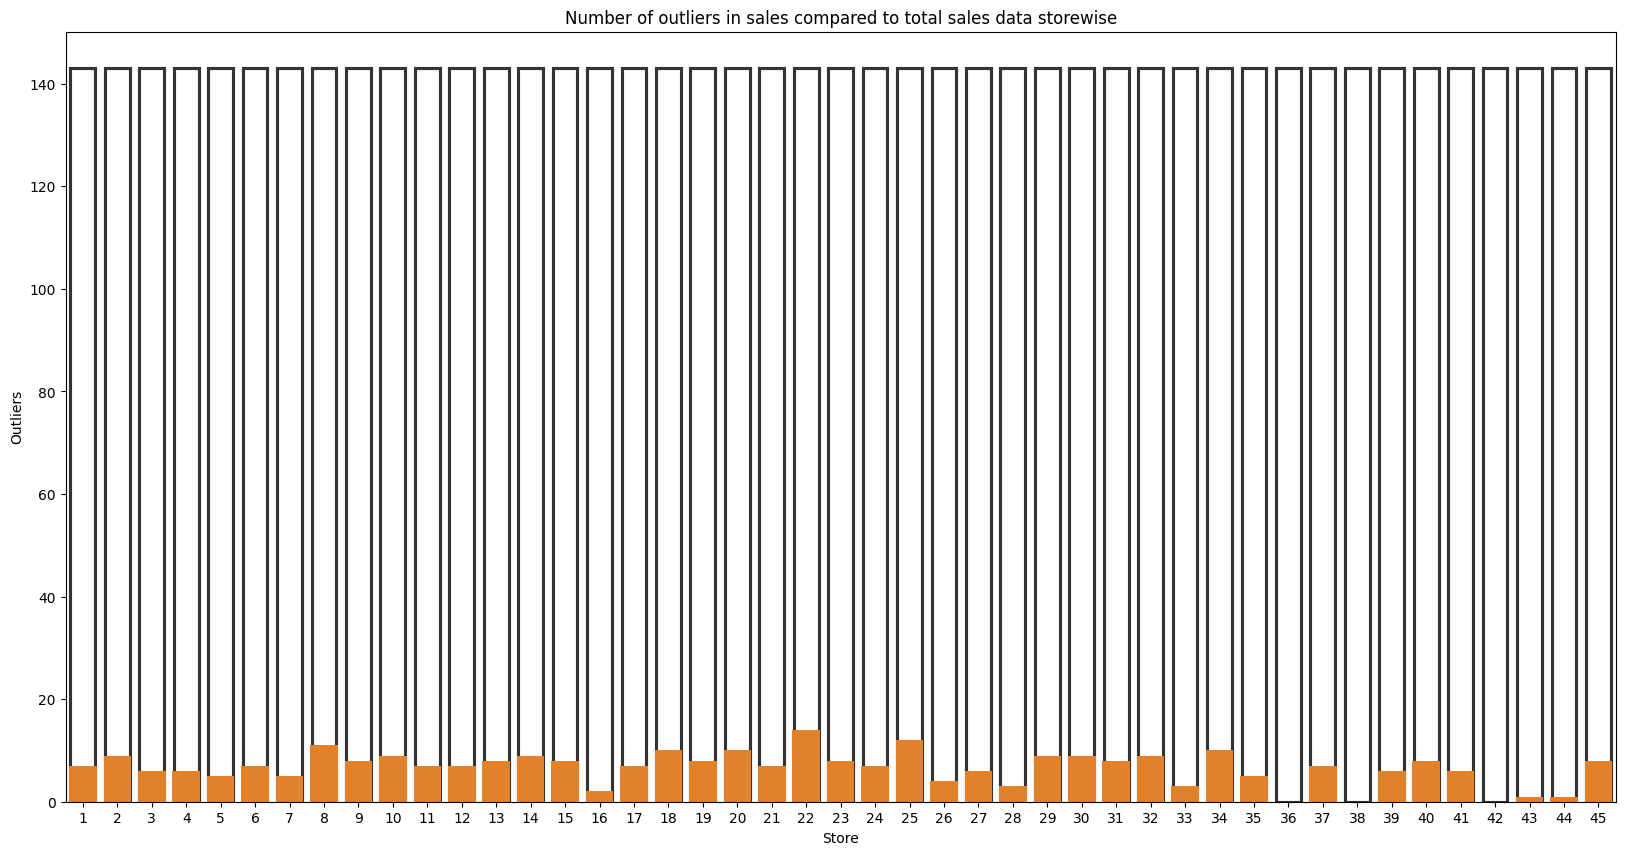

In [84]:
#Outliers in sales for each store
outliers = pd.DataFrame(columns = ['Store', 'Outliers'])
for i in range(1,46):
    store_no = data[['Store','Weekly_Sales']][data['Store']==i]
    IQR = store_no['Weekly_Sales'].quantile(0.75) - store_no['Weekly_Sales'].quantile(0.25)
    upper_limit = store_no['Weekly_Sales'].quantile(0.75) + (1.5*IQR)
    lower_limit = store_no['Weekly_Sales'].quantile(0.25) - (1.5*IQR)
    quantity = store_no[(store_no['Weekly_Sales'] > upper_limit) | (store_no['Weekly_Sales'] < lower_limit)]['Store'].count()
    new_df = pd.DataFrame([[i, quantity]], columns = ['Store', 'Outliers'])
    outliers = pd.concat([outliers, new_df], ignore_index = True)

plt.figure(figsize = (20,10))
sns.barplot(x = [i for i in range (1,46)], y = [143]*45, fill = False, gap = 0.1, edgecolor = '0.2')
sns.barplot(x=outliers['Store'], y = outliers['Outliers'])
plt.title("Number of outliers in sales compared to total sales data storewise")
plt.show()

***The number of data is less and the number of outliers are very less compared to the total data for each store. Considering the fact that the outliers are less in number when considered store wise, no changes are done to the outliers to maintain integrity of the overall data***

In [85]:
Store_sum = data.groupby('Store')[['Weekly_Sales','Holiday_Flag']].sum().reset_index().sort_values(by='Weekly_Sales', ascending = False)
Store_sum.head()

Store  Weekly_Sales  Holiday_Flag
19     20  3.013978e+08            10
3       4  2.995440e+08            10
13     14  2.889999e+08            10
12     13  2.865177e+08            10
1       2  2.753824e+08            10

In [86]:
Store_sum['Weekly_Sales'] = Store_sum['Weekly_Sales'].astype(int)
Store_sum.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, 19 to 32
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Store         45 non-null     int64
 1   Weekly_Sales  45 non-null     int32
 2   Holiday_Flag  45 non-null     int64
dtypes: int32(1), int64(2)
memory usage: 1.2 KB


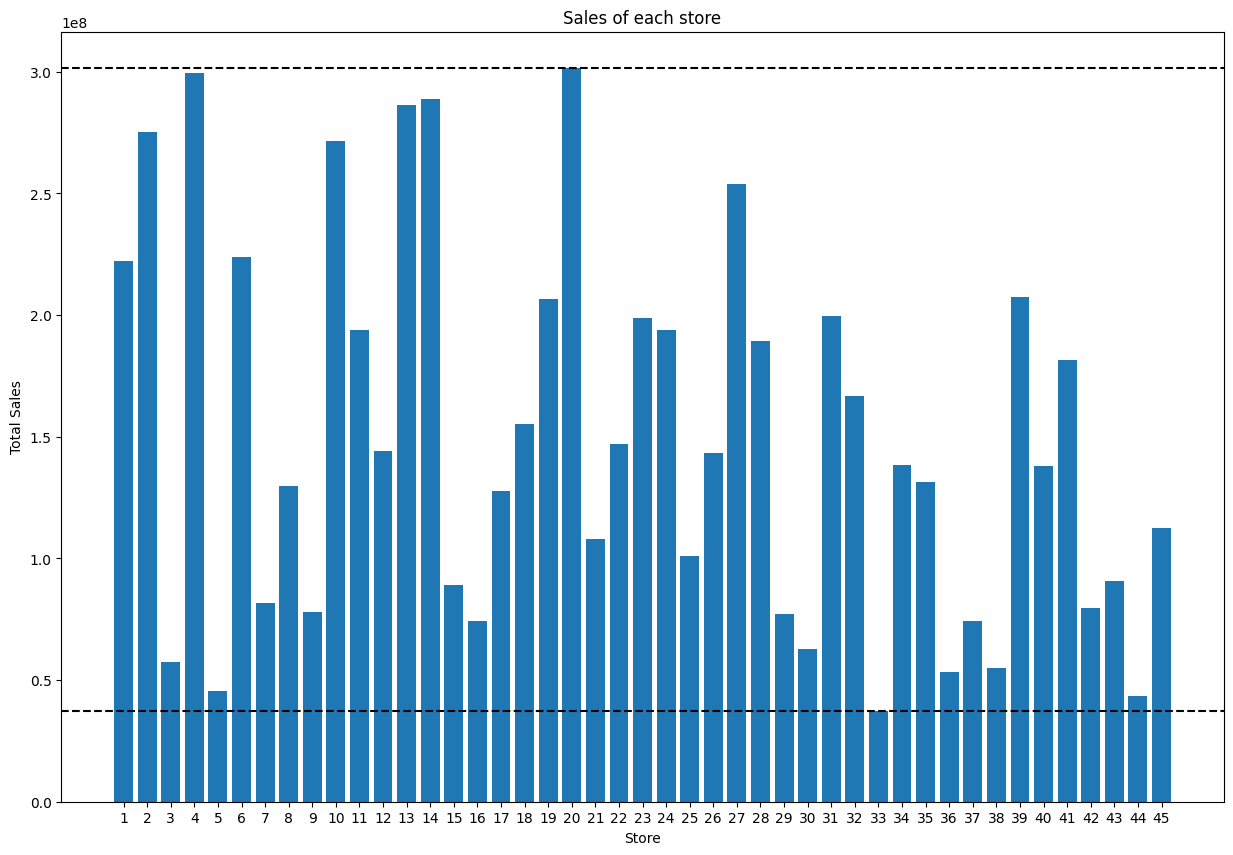

In [103]:
plt.figure(figsize=(15,10))
plt.bar(Store_sum['Store'], Store_sum['Weekly_Sales'])
plt.axhline(y = Store_sum['Weekly_Sales'].max(), color = 'black', linestyle = '--')
plt.axhline(y = Store_sum['Weekly_Sales'].min(), color = 'black', linestyle = '--')
plt.xticks(Store_sum['Store'])
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.title('Sales of each store')
plt.show()

***Store 20 has the highest sales and Store 33 has the least sales***

# ***Affect of unemployment on store sales***

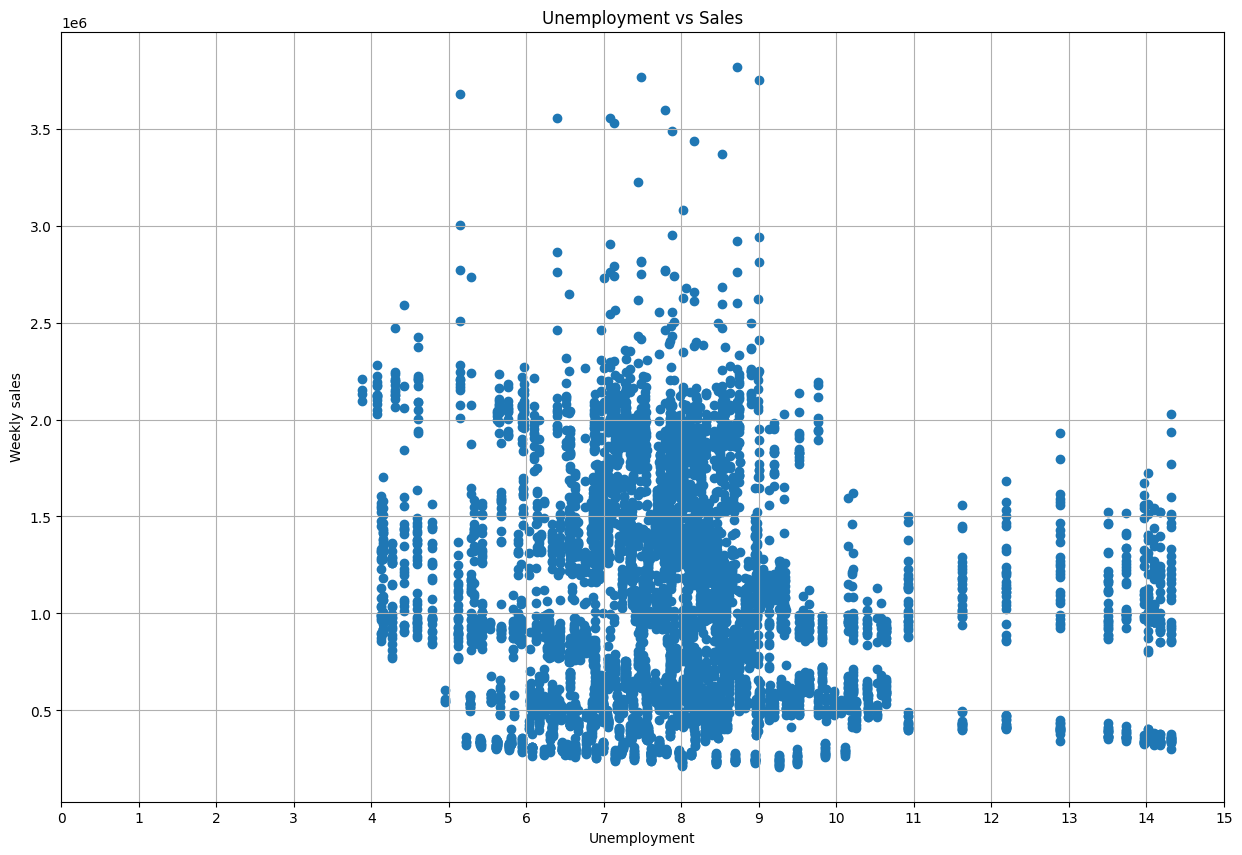

In [93]:
plt.figure(figsize=(15,10))
plt.scatter(x = 'Unemployment', y = 'Weekly_Sales', data = data)
plt.xlabel('Unemployment')
plt.ylabel('Weekly sales')
plt.xticks([i for i in range(0,16)])
plt.title('Unemployment vs Sales')
plt.grid(True)
plt.show()

In [132]:
print("Number of weekly sales with unemployment rate more than 9 --> {}".format(data[data['Unemployment']>9]['Store'].count()))
print("Number of weekly sales with unemployment rate less than 6 --> {}".format(data[data['Unemployment']<6]['Store'].count()))
print("Number of weekly sales with unemployment rate between 6 and 9 --> {}".format(data[(data['Unemployment']>=6) & (data['Unemployment']<=9)]['Store'].count()))

Number of weekly sales with unemployment rate more than 9 --> 1132
Number of weekly sales with unemployment rate less than 6 --> 622
Number of weekly sales with unemployment rate between 6 and 9 --> 4681


In [131]:
print("Total sales in unemployment rate greater than 9 --> {}".format(data[data['Unemployment']>9]['Weekly_Sales'].sum()))
print("Total sales in unemployment rate less than 6 --> {}".format(data[data['Unemployment']<6]['Weekly_Sales'].sum()))

Total sales in unemployment rate greater than 9 --> 966988187.74
Total sales in unemployment rate less than 6 --> 734335122.95


In [129]:
print("Number of stores with unemployment rate more than 9 --> {}".format(data[data['Unemployment']>9]['Store'].nunique()))
print("Count of sales for those stores--> ", data[data['Unemployment']>9]['Store'].value_counts(), sep="\n")

Number of stores with unemployment rate more than 9 --> 13
Count of sales for those stores--> 
Store
12    143
28    143
38    143
34    139
43    139
29    130
18     60
10     48
33     48
42     48
7      35
32     35
35     21
Name: count, dtype: int64


In [130]:
print("Number of stores with unemployment rate less than 6 --> {}".format(data[data['Unemployment']<6]['Store'].nunique()))
print("Count of sales for those stores--> ", data[data['Unemployment']<6]['Store'].value_counts(), sep="\n")

Number of stores with unemployment rate less than 6 --> 11
Count of sales for those stores--> 
Store
23    143
40    143
4      83
5      43
8      43
9      43
44     43
6      30
13     30
17     17
16      4
Name: count, dtype: int64


***Maximum of the sales are concentrated between unemployment rate of 6 and 9. However total sales are higher on the regions with unemployment rate greater than 9 compare to regions with unemployment rate less than 6, this is probably beacuse of the higher number of stores in that region.***

In [133]:
from scipy.stats import pearsonr

In [134]:
c, p = pearsonr(data['Weekly_Sales'], data['Unemployment'])
c , p

(-0.10617608965795415, 1.3448365210234661e-17)

In [135]:
Store, Corr, pValue = [],[],[]
for i in data['Store'].unique():
    Store.append(i)
    c, p = pearsonr(data['Weekly_Sales'][data['Store']==i], data['Unemployment'][data['Store']==i])
    Corr.append(c)
    pValue.append(p)
    

In [136]:
Corr_data = pd.DataFrame(data = {'Store' : Store, 'Corr' : Corr, "pValue" : pValue})
Corr_data.head()

Store      Corr    pValue
0      1 -0.097955  0.244466
1      2  0.066325  0.431261
2      3 -0.230413  0.005631
3      4 -0.337015  0.000039
4      5 -0.207043  0.013098

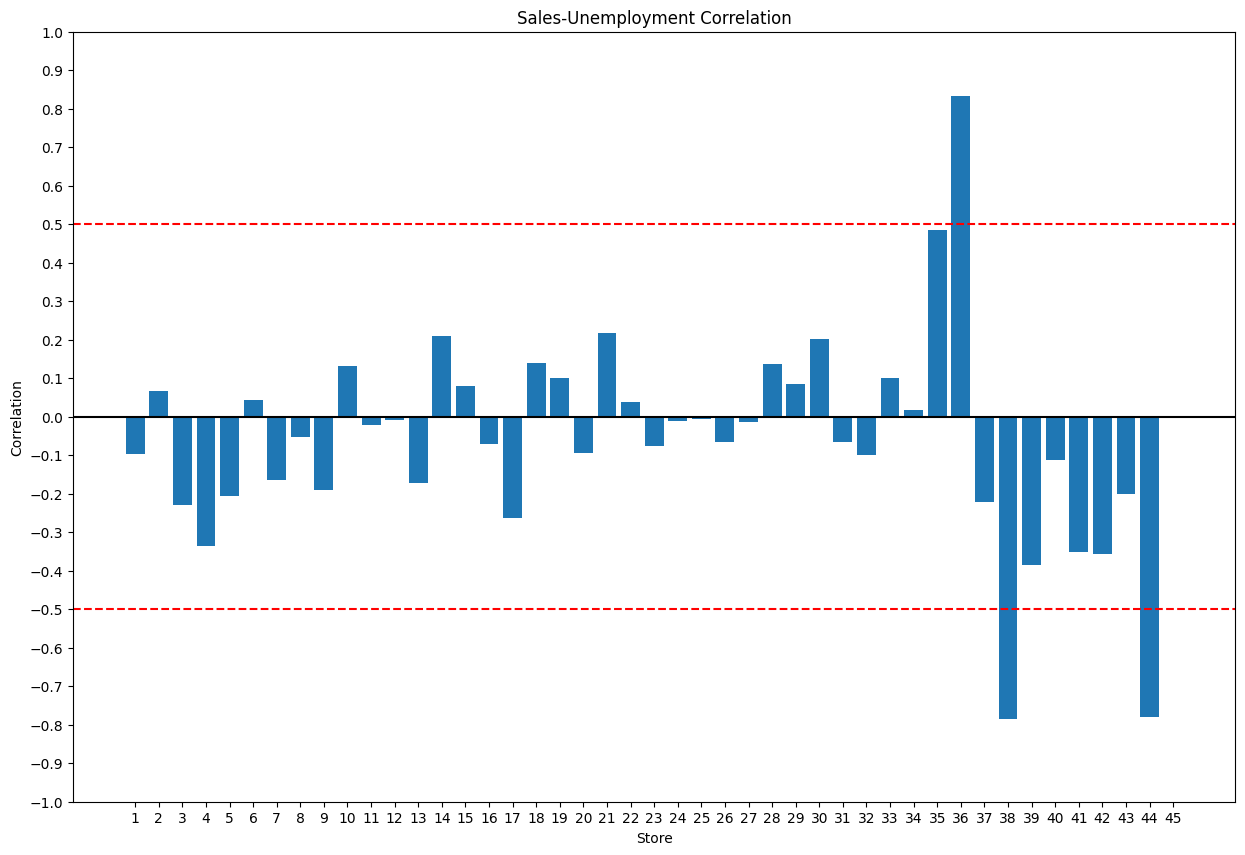

In [137]:
plt.figure(figsize=(15,10))
plt.bar(Corr_data['Store'], Corr_data['Corr'])
plt.axhline(y = 0.5, label = 'Corr = 0.5', color = 'red', linestyle = '--')
plt.axhline(y = -0.5, label = 'Corr = -0.5', color = 'red', linestyle = '--')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.yticks(np.arange(-1,1.1,0.1))
plt.xticks(Corr_data['Store'])
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.title('Sales-Unemployment Correlation')
plt.show()

***Store 36 shows a strong positive correlation of sales and unemployment rate suggesting a increase in sales with increase in unemployment rate. A similar trend is observed for the store 35 but with a lesser impact.*** 
***Whereas store 38, 44 have a strong negative correlation of sales with unemployment rate suggesting a increase in sales with decrease in unemployment rate.***

# ***If the weekly sales show a seasonal trend, when and what could be the reason?***

In [23]:
data_time = data.copy()
data_time['Month'] = data_time['Date'].dt.month
data_time['Year'] = data_time['Date'].dt.year
data_time.head()

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1 2010-02-05    1643690.90             0        42.31       2.572   
1      1 2010-02-12    1641957.44             1        38.51       2.548   
2      1 2010-02-19    1611968.17             0        39.93       2.514   
3      1 2010-02-26    1409727.59             0        46.63       2.561   
4      1 2010-03-05    1554806.68             0        46.50       2.625   

          CPI  Unemployment  Month  Year  
0  211.096358         8.106      2  2010  
1  211.242170         8.106      2  2010  
2  211.289143         8.106      2  2010  
3  211.319643         8.106      2  2010  
4  211.350143         8.106      3  2010

C:\Users\Pritam\AppData\Local\Temp\ipykernel_33004\4157726135.py:1: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(x = data_time['Month'][data_time['Store']==1], y = data_time['Weekly_Sales'][data_time['Store']==1], hue = data_time['Year'], estimator = 'mean' ,palette = sns.color_palette("Set1"))


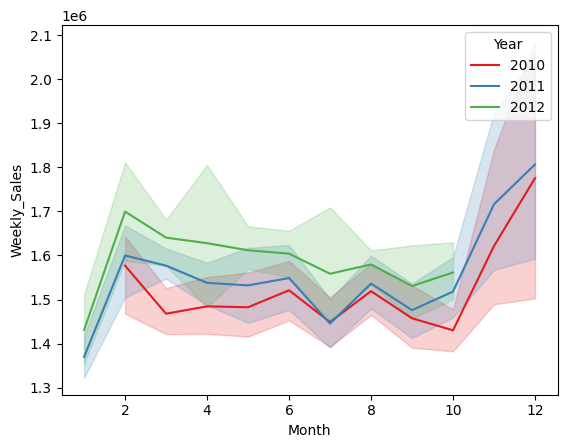

In [24]:
sns.lineplot(x = data_time['Month'][data_time['Store']==1], y = data_time['Weekly_Sales'][data_time['Store']==1], hue = data_time['Year'], estimator = 'mean' ,palette = sns.color_palette("Set1"))
plt.show()

In [25]:
data_time[(data_time['Store']==1) & (data_time['Month'].isin([11,12]))]

Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
39      1 2010-11-05    1551659.28             0        58.74       2.689   
40      1 2010-11-12    1494479.49             0        59.61       2.728   
41      1 2010-11-19    1483784.18             0        51.41       2.771   
42      1 2010-11-26    1955624.11             1        64.52       2.735   
43      1 2010-12-03    1548033.78             0        49.27       2.708   
44      1 2010-12-10    1682614.26             0        46.33       2.843   
45      1 2010-12-17    1891034.93             0        49.84       2.869   
46      1 2010-12-24    2387950.20             0        52.33       2.886   
47      1 2010-12-31    1367320.01             1        48.43       2.943   
91      1 2011-11-04    1697229.58             0        54.98       3.332   
92      1 2011-11-11    1594938.89             0        59.11       3.297   
93      1 2011-11-18    1539483.70             0        62.25       3.308   
94      1 2011-11-25    2033320.66             1        60.14       3.236   
95      1 2011-12-02    1584083.95             0        48.91       3.172   
96      1 2011-12-09    1799682.38             0        43.93       3.158   
97      1 2011-12-16    1881176.67             0        51.63       3.159   
98      1 2011-12-23    2270188.99             0        47.96       3.112   
99      1 2011-12-30    1497462.72             1        44.55       3.129   

           CPI  Unemployment  Month  Year  
39  211.956394         7.838     11  2010  
40  212.003944         7.838     11  2010  
41  211.889674         7.838     11  2010  
42  211.748433         7.838     11  2010  
43  211.607193         7.838     12  2010  
44  211.465953         7.838     12  2010  
45  211.405312         7.838     12  2010  
46  211.405122         7.838     12  2010  
47  211.404932         7.838     12  2010  
91  217.837382         7.866     11  2011  
92  217.998085         7.866     11  2011  
93  218.220509         7.866     11  2011  
94  218.467621         7.866     11  2011  
95  218.714733         7.866     12  2011  
96  218.961846         7.866     12  2011  
97  219.179453         7.866     12  2011  
98  219.357722         7.866     12  2011  
99  219.535990         7.866     12  2011

C:\Users\Pritam\AppData\Local\Temp\ipykernel_33004\1405407059.py:3: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(x = data_time['Date'][data_time['Store']==i], y = data_time['Weekly_Sales'][data_time['Store']==i], ax = axs[i-1], hue = data_time['Year'], palette = sns.color_palette("Set1"))
C:\Users\Pritam\AppData\Local\Temp\ipykernel_33004\1405407059.py:3: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(x = data_time['Date'][data_time['Store']==i], y = data_time['Weekly_Sales'][data_time['Store']==i], ax = axs[i-1], hue = data_time['Year'], palette = sns.color_palette("Set1"))
C:\Users\Pritam\AppData\Local\Temp\ipykernel_33004\1405407059.py:3: UserWarning: The palette list has more values (9) than needed (3), which may not be intended.
  sns.lineplot(x = data_time['Date'][data_time['Store']==i], y = data_time['Weekly_Sales'][data_time['Store']==i], ax = axs[i-1], 

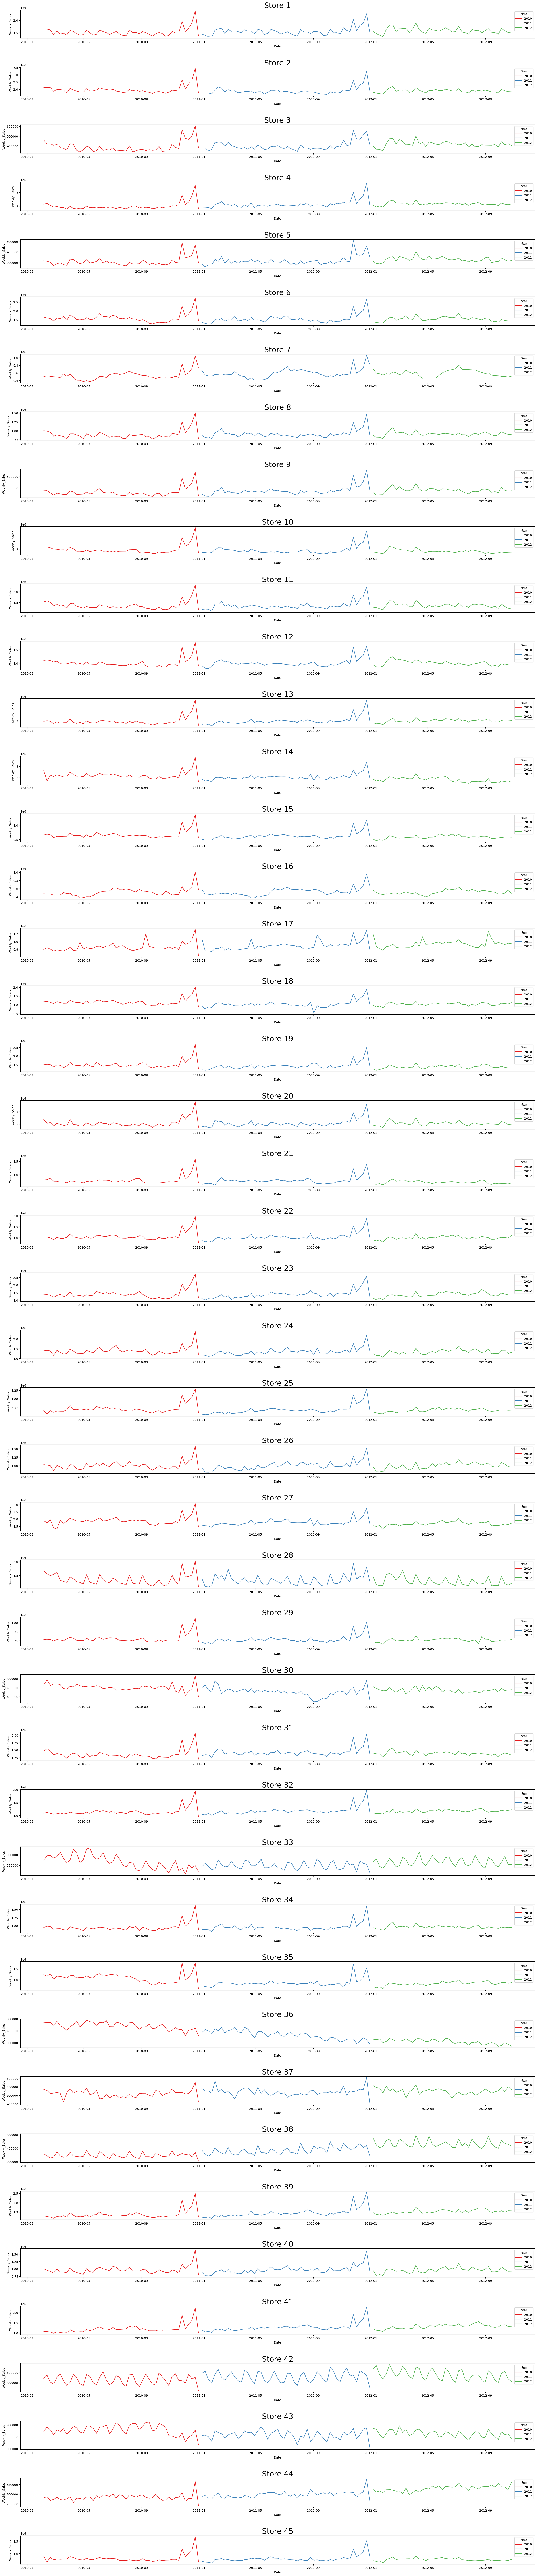

In [26]:
fig, axs = plt.subplots(45,1, figsize = (30,150), sharex = False, gridspec_kw = {'hspace' : 1})
for i in data_time['Store'].unique():
    sns.lineplot(x = data_time['Date'][data_time['Store']==i], y = data_time['Weekly_Sales'][data_time['Store']==i], ax = axs[i-1], hue = data_time['Year'], palette = sns.color_palette("Set1"))
    # axs[i-1].plot(data['Date'][data['Store']==i], data['Holiday_Flag'][data['Store']==i],)
    axs[i-1].set_title(f'Store {i}', fontsize = 24)

plt.show() 

***Over 90% of stores have a seasonal increase in sales during the last two months of 2010 and 2011, the reason being the holiday season***

# ***Does temperature affect the weekly sales in any manner?***

In [27]:
plt.figure(figsize=(10,6))
plt.scatter(x = 'Temperature', y = 'Weekly_Sales', data = data)
plt.xlabel('Unemployment')
plt.ylabel('Weekly sales')
plt.title('Temperature vs Sales')
plt.grid(True)
plt.show()

In [28]:
c, p = pearsonr(data['Weekly_Sales'], data['Temperature'])
c , p

(-0.06381001317946959, 3.0076476258332254e-07)

In [29]:
Store_T, Corr_T, pValue_T = [],[],[]
for i in data['Store'].unique():
    Store_T.append(i)
    c, p = pearsonr(data['Weekly_Sales'][data['Store']==i], data['Temperature'][data['Store']==i])
    Corr_T.append(c)
    pValue_T.append(p)

Corr_Temp = pd.DataFrame(data = {'Store' : Store_T, 'Corr' : Corr_T, "pValue" : pValue_T})
Corr_Temp.head()

Store      Corr    pValue
0      1 -0.222701  0.007509
1      2 -0.297673  0.000305
2      3 -0.377524  0.000003
3      4 -0.225583  0.006751
4      5 -0.175517  0.036015

In [30]:
plt.figure(figsize=(15,10))
plt.bar(Corr_Temp['Store'], Corr_Temp['Corr'])
plt.axhline(y = 0.5, label = 'Corr = 0.5', color = 'red', linestyle = '--')
plt.axhline(y = -0.5, label = 'Corr = -0.5', color = 'red', linestyle = '--')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.yticks(np.arange(-1,1.1,0.1))
plt.xticks(Corr_Temp['Store'])
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.title('Sales-Temperature Correlation')
plt.show()

In [31]:
# store with highest negative correlation
plt.bar(data['Temperature'][data['Store']==10], data['Weekly_Sales'][data['Store']==10])
plt.show()

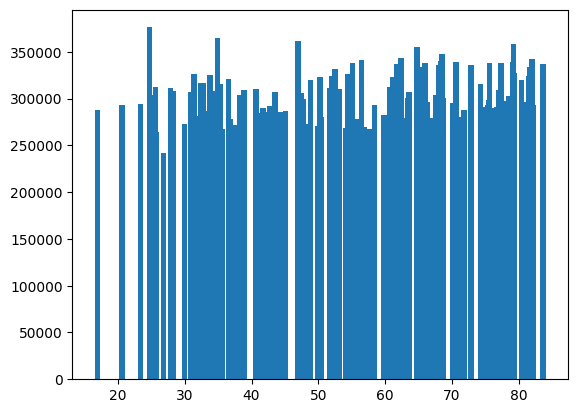

In [32]:
# store with highest positive correlation
plt.bar(data['Temperature'][data['Store']==44], data['Weekly_Sales'][data['Store']==44])
plt.show()

***In general, maximum sales are between temperature 40 and 80 degrees whereas for extreme temperatures the sales seems to reduce, suggesting proper sales in a pleasant weather. Sales of most stores are negatively affected by the rise in temperature but the affect is not that pronounced as the sales do not change much***

# ***How is the Consumer Price index affecting the weekly sales of various stores?***

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(x = 'CPI', y = 'Weekly_Sales', data = data)
plt.xlabel('Unemployment')
plt.ylabel('Weekly sales')
plt.title('Temperature vs Sales')
plt.grid(True)
plt.show()

In [34]:
c, p = pearsonr(data['Weekly_Sales'], data['CPI'])
c , p

(-0.07263416204017621, 5.438292612176736e-09)

In [35]:
Store_CPI, Corr_CPI, pValue_CPI = [],[],[]
for i in data['Store'].unique():
    Store_CPI.append(i)
    c, p = pearsonr(data['Weekly_Sales'][data['Store']==i], data['CPI'][data['Store']==i])
    Corr_CPI.append(c)
    pValue_CPI.append(p)

Corr_CPI = pd.DataFrame(data = {'Store' : Store_CPI, 'Corr' : Corr_CPI, "pValue" : pValue_CPI})
Corr_CPI.head()

Store      Corr    pValue
0      1  0.225408  0.006794
1      2 -0.062431  0.458853
2      3  0.317250  0.000113
3      4  0.351157  0.000017
4      5  0.308261  0.000180

In [36]:
plt.figure(figsize=(15,10))
plt.bar(Corr_CPI['Store'], Corr_CPI['Corr'])
plt.axhline(y = 0.5, label = 'Corr = 0.5', color = 'red', linestyle = '--')
plt.axhline(y = -0.5, label = 'Corr = -0.5', color = 'red', linestyle = '--')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.yticks(np.arange(-1,1.1,0.1))
plt.xticks(Corr_CPI['Store'])
plt.xlabel('Store')
plt.ylabel('Correlation')
plt.title('Sales-CPI Correlation')
plt.show()

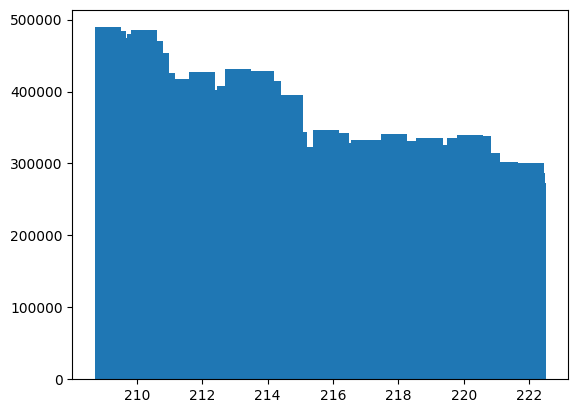

In [37]:
# store with highest negative correlation
plt.bar(data['CPI'][data['Store']==36], data['Weekly_Sales'][data['Store']==36])
plt.show()

In [38]:
# store with highest positive correlation
plt.bar(data['CPI'][data['Store']==38], data['Weekly_Sales'][data['Store']==38])
plt.show()

***There are manly three clusters of CPI wrt sales, CPI <= 140 makes cluster 1, 180 <= CPI <= 200 makes cluster 2,  CPI > 200 makes cluster 3. Maximum concentration of sales are on cluster 1 & 3 indicating higher sales in low and high CPI regions***

***Sales of store 36 has decreased with the increase in the CPI whereas store 38 and 44 has shown an increase in sales with the increase in CPI***

***Rest stores are moderately affected by the CPI with a higher percentage of them having an increase in sales with increase in CPI***

# ***Top performing stores according to the historical data.***

In [39]:
Store_sales = data.groupby('Store')[['Weekly_Sales']].sum().sort_values(by='Weekly_Sales', ascending = False).reset_index()
Store_sales['Weekly_Sales'] = Store_sales['Weekly_Sales'].astype(int)
print('Top 5 performing stores are -->')
Store_sales.head()

Top 5 performing stores are -->


Store  Weekly_Sales
0     20     301397792
1      4     299543953
2     14     288999911
3     13     286517703
4      2     275382440

# ***The worst performing store, and how significant is the difference between the highest and lowest performing stores.***

In [40]:
print('Worst performing stores are -->')
Store_sales.tail()

Worst performing stores are -->


Store  Weekly_Sales
40     38      55159626
41     36      53412214
42      5      45475688
43     44      43293087
44     33      37160221

In [41]:
print('Difference between highest and lowest store is -->')
Store_sales['Weekly_Sales'].max() - Store_sales['Weekly_Sales'].min()

Difference between highest and lowest store is -->


264237571

***Store 20, 4, 14, 13 and 2 are among the highest performing stores whereas store 33 is the worst performing store. The difference between the highest and lowest performing stores are greatlysignificant as it lies in the range of 10^8(almost a billion)***

# ***Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks***

## Modules used and created functions

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [40]:
#for time series
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm 
from prophet import Prophet

C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [41]:
def tseries(df, store):
    'Converting to time series data'
    tseries = df[['Date','Weekly_Sales']][df['Store']==store].set_index('Date')
    return tseries

def stationarytest(df):
    '''Performing ADFuller and KPSS test for stationarity
    Takes tseries as input'''
    result_a = adfuller(df,autolag='AIC')
    result_k = kpss(df)
    sns.lineplot(df)
    plt.title('Store sales')
    if result_a[1] <= 0.05 and result_k[1] >= 0.05:
        print ('Both ADFuller and KPSS indicates store sales are stationary')
    elif result_a[1] >= 0.05 and result_k[1] >= 0.05:
        print ('ADFuller ---> Store sales are not stationary', 'KPSS ---> Store sales are stationary', sep='\n')
    elif result_a[1] <= 0.05 and result_k[1] <= 0.05:
        print ('ADFuller ---> Store sales are stationary', 'KPSS ---> Store sales are not stationary', sep='\n')
    elif result_a[1] >= 0.05 and result_k[1] <= 0.05:
        print ('Both ADFuller and KPSS indicates store sales are not stationary')
    print('ADFuller --->',result_a, 'KPSS --->', result_k, sep='\n')

def plot_rolling(ts, window = 10):
    '''Plotting rolling mean and variance
    Takes tseries as input'''
    Mean = ts.rolling(window=window).mean()
    Std = ts.rolling(window=window).std()
    plt.plot(ts, label = 'Original', color = 'blue')
    plt.plot(Mean, label = 'Rmean', color = 'red')
    plt.plot(Std, label = 'Rstd', color = 'orange')
    plt.legend()
    plt.show()

def plot_difference(ts, n_diff):
    '''Plotting differencing values
    Takes tseries as input'''    
    ts1 = ts.copy()
    for i in range(1,n_diff+1):
        ts1[f'{i}_diff'] = diff(ts1['Weekly_Sales'], k_diff = i)
    
    fig , ax = plt.subplots(nrows = ((n_diff // 2) + 1), ncols = 2, figsize = (10,10))
    m=0
    for i in range(((n_diff // 2) + 1)):
        for j,k in enumerate(ts1.columns[m:m+2]):
            ts1[k].plot(ax = ax[i][j], title = k)
        m = m+2
    plt.tight_layout()
    plt.show()
    
def ACF_PACF(df, lag = None):
    'Plotting ACF and PACF plot'
    return plot_acf(df, lags = lag), plot_pacf(df, lags = lag)

def plot_decomp(df):
    decomposition = seasonal_decompose(df)
    decomposition.plot()
    plt.show()

def train_test(df, split):
    '''test-train split
    Takes tseries as input'''    
    train = df.iloc[:split]
    test = df.iloc[split:]
    return train,test

In [42]:
#for time series model choosing
def series_fit(df, train, test, m = 1, d = None, D = None, trace = True, information_criterion = 'aic'):
    "Takes the train data as input for models"
    "Supply the timeseries data of a store for ploting"
    temp = df.copy()

    'For ARIMA'
    model_ARIMA = pm.auto_arima(train, d = d, trace = trace, information_criterion = information_criterion)
    temp['pred_ARIMA'] = model_ARIMA.predict(n_periods = len(test))
    print('ARIMA model prediction generated')

    'For SARIMA'
    model_SARIMA = pm.auto_arima(train, m = m, d = d, D = D, trace = trace, information_criterion = information_criterion)
    temp['pred_SARIMA'] = model_SARIMA.predict(n_periods = len(test))
    if m == 1:
        print('Since value of seasonality(m) is not given the SARIMA model will behave same as ARIMA model')
    print('SARIMA model prediction generated')

    'For Prophet'
    'Formating train data for Prophet input'
    train_p = train.copy()
    train_p.reset_index(inplace=True)
    train_p.columns = ['ds','y']
    train_p['ds'] = pd.to_datetime(train_p['ds'])

    'Formating test data for Prophet input'
    test_p = test.copy()
    test_p.reset_index(inplace=True)
    test_p.columns = ['ds','y']
    test_p['ds'] = pd.to_datetime(test_p['ds'])

    model_prophet = Prophet(interval_width=0.95)
    model_prophet.fit(train_p)
    forecast_p = model_prophet.predict(test_p.drop('y',axis = 1))
    pred_prophet = forecast_p[['ds', 'yhat']].set_index('ds')
    temp['pred_Prophet'] = pred_prophet
    print('Prophet model prediction generated')

    'Ploting all the predictions'
    fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10))
    temp[['Weekly_Sales','pred_ARIMA']].plot(ax = ax[0], title = 'ARIMA model')
    temp[['Weekly_Sales','pred_SARIMA']].plot(ax = ax[1], title = 'SARIMA model')
    prophet_plot = model_prophet.plot(forecast_p, include_legend = True, ax = ax[2])
    temp['Weekly_Sales'].plot(legend = True, ax = ax[2], title = 'Prophet model', color = 'green')
    plt.tight_layout()
    plt.show()

    return temp 

## For Store 1

In [43]:
#Creating time series
Store_1 = tseries(data,1)
Store_1.head()

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68

In [44]:
Store_1.shape

(143, 1)

ADFuller ---> Store sales are stationary
KPSS ---> Store sales are not stationary
ADFuller --->
(-5.102186145192286, 1.3877788330759535e-05, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3412.7325502876756)
KPSS --->
(0.4758942566191388, 0.047095888148842614, 4, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


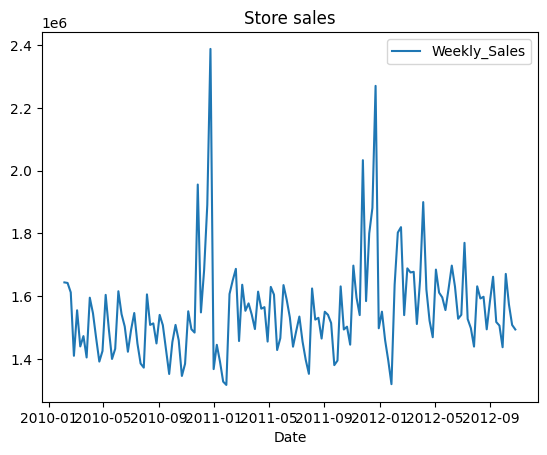

In [45]:
#checking stationarity for a particular store by statistical test
stationarytest(Store_1)

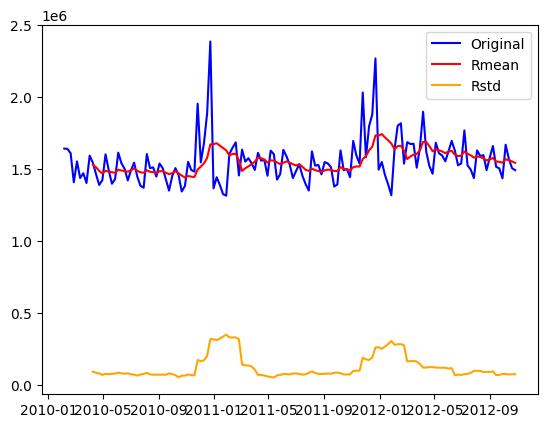

In [46]:
# rolling mean and variance
plot_rolling(Store_1, window=10)

***Statistical testing for stationarity gives amigious results. Moreover upon visual inspection and checking rolling mean the series seems to not stationary*** 

In [47]:
#plot differencing values for stationary check
plot_difference(Store_1,n_diff = 3)

***First differencing seems to be stationary***

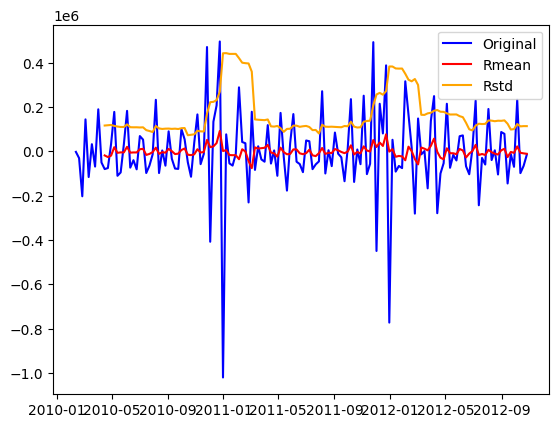

In [48]:
#Plotting rolling graph for differencing value 1
diff_1 = (diff(Store_1, k_diff=1))
plot_rolling(diff_1, window=10)

***The rolling mean of first difference appears to stationary***

C:\Users\Pritam\AppData\Local\Temp\ipykernel_28300\1308318146.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_k = kpss(df)


Both ADFuller and KPSS indicates store sales are stationary
ADFuller --->
(-7.2615753740025095, 1.6761796699230575e-10, 7, 134, {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}, 3396.8250847356326)
KPSS --->
(0.09970858691328315, 0.1, 24, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


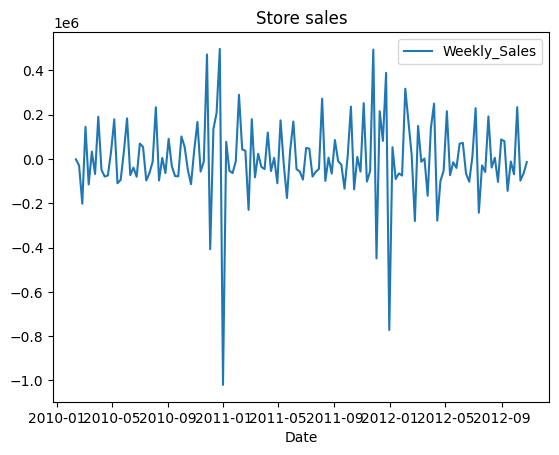

In [49]:
#checking stationarity by statistical test for differencing value 1
stationarytest(diff_1)

***Statiscal test indicate the first difference to be stationary***

***Hence value of d will be taken as 1 for ARIMA model (d=1)***

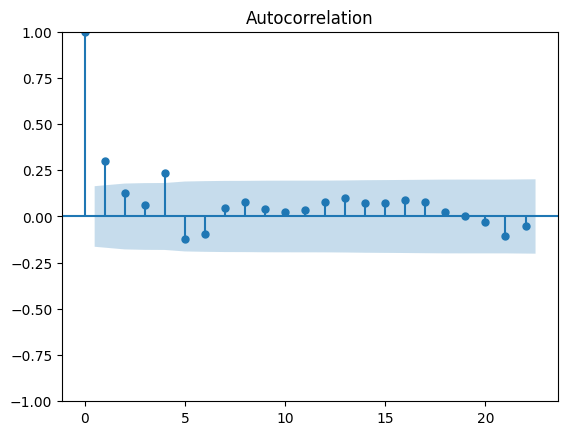

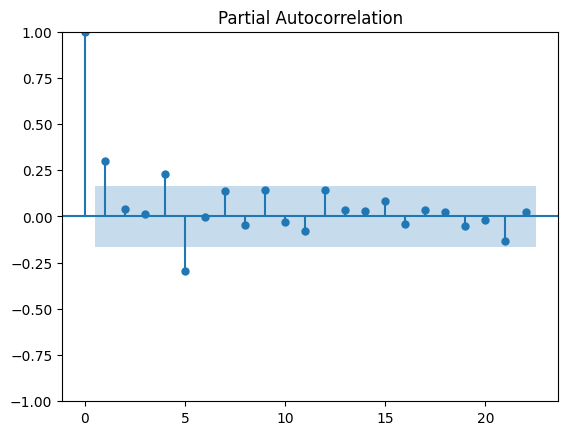

In [50]:
# plotting ACF ad PCF plot for store 1
ACF_PACF_plot = ACF_PACF(Store_1)

***There is a sudden drop in the ACF plot, with PACF plot having some significant value, which indicates this to be mostly an AR model***

***From the PACF plot, the value of p can start with 1 for ARIMA model***

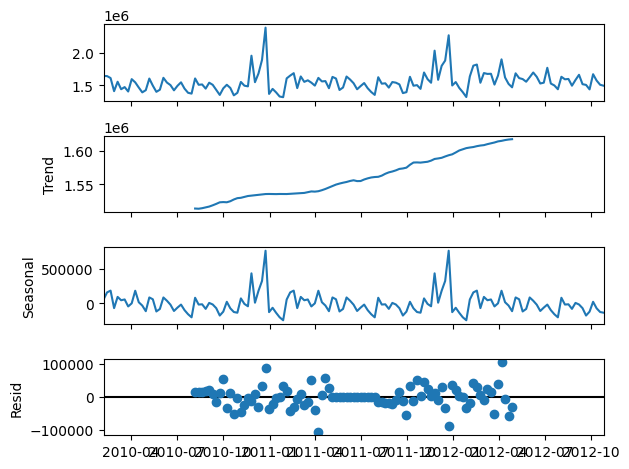

In [51]:
#plot seasonal decomposition for store 1
plot_decomp(Store_1)

***The sales have a general increasing trend. There is a presence of seasonality in the data, which we noticed before also. A seasonal ARIMA model would be better than a general ARIMA model***

### Time series modeling and forecasting

In [52]:
#test-train split 
train_1,test_1 = train_test(Store_1,110)

In [53]:
# applying ARIMA, SARIMA, FBProphet to check the predictions of each model
# keeping d =1 for ARIMA and SARIMA
# m=52 as it is a weekly data

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2971.767, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2963.358, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2959.098, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2969.771, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2949.966, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2952.431, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.20 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2953.608, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2962.468, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2949.498, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2957.295, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2961.369, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2951.692, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=i

19:10:08 - cmdstanpy - INFO - Chain [1] start processing
19:10:09 - cmdstanpy - INFO - Chain [1] done processing


Prophet model prediction generated


C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


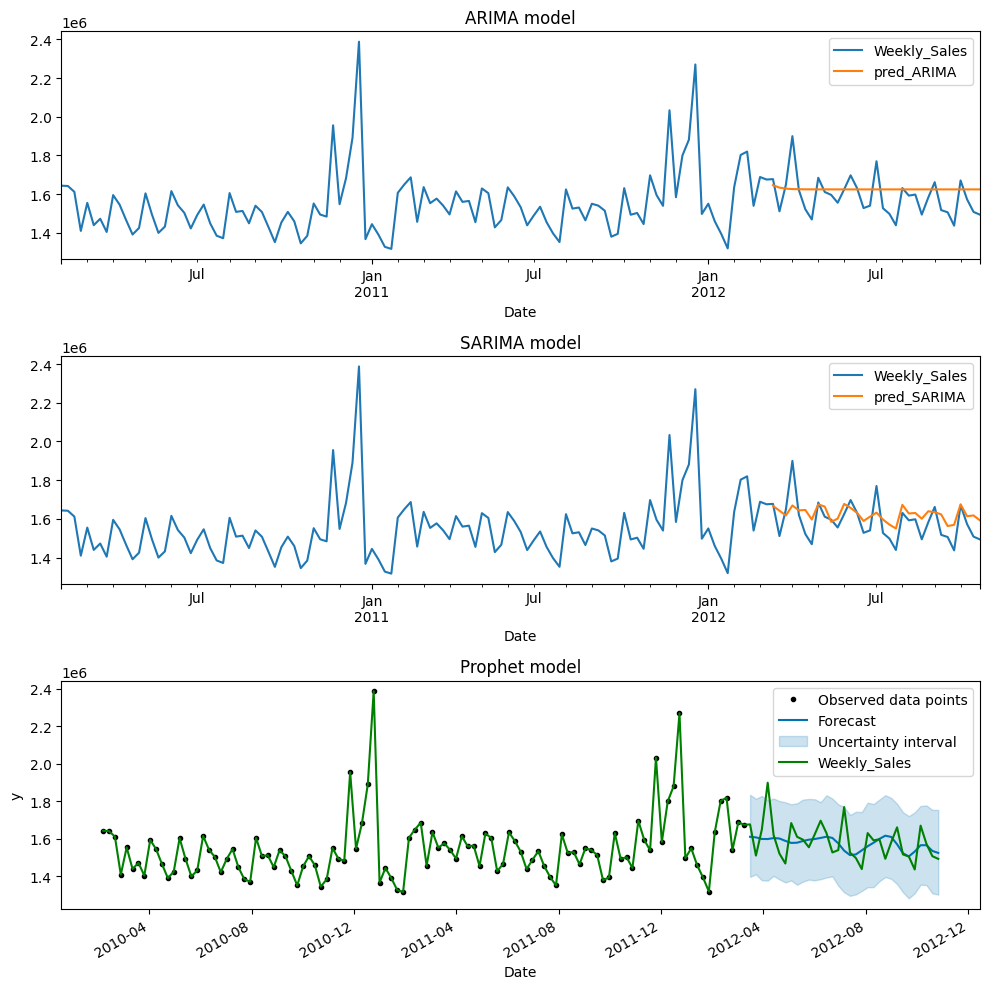

In [54]:
pred_values_1 = series_fit(Store_1, train_1, test_1, m = 52, d=1, trace = True)

***From three models, SARIMA model seems to be generating best fitting curve. Hence using SARIMA to forecast sales of Store 1***

In [55]:
pred_values_1

Weekly_Sales    pred_ARIMA   pred_SARIMA  pred_Prophet
Date                                                              
2010-02-05    1643690.90           NaN           NaN           NaN
2010-02-12    1641957.44           NaN           NaN           NaN
2010-02-19    1611968.17           NaN           NaN           NaN
2010-02-26    1409727.59           NaN           NaN           NaN
2010-03-05    1554806.68           NaN           NaN           NaN
...                  ...           ...           ...           ...
2012-09-28    1437059.26  1.624487e+06  1.569250e+06  1.532547e+06
2012-10-05    1670785.97  1.624487e+06  1.675352e+06  1.566448e+06
2012-10-12    1573072.81  1.624487e+06  1.613662e+06  1.566462e+06
2012-10-19    1508068.77  1.624487e+06  1.617718e+06  1.535987e+06
2012-10-26    1493659.74  1.624487e+06  1.591997e+06  1.525389e+06

[143 rows x 4 columns]

### FINAL prediction

In [56]:
Sarima = SARIMAX(Store_1, order = (1,1,1), seasonal_order =(1,0,0,52)) #weekly data
model_Sarima = Sarima.fit()

C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [57]:
pred_Sarima = model_Sarima.predict(start = len(Store_1), end = len(Store_1) + 12, dydnamic = True )

C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dydnamic']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


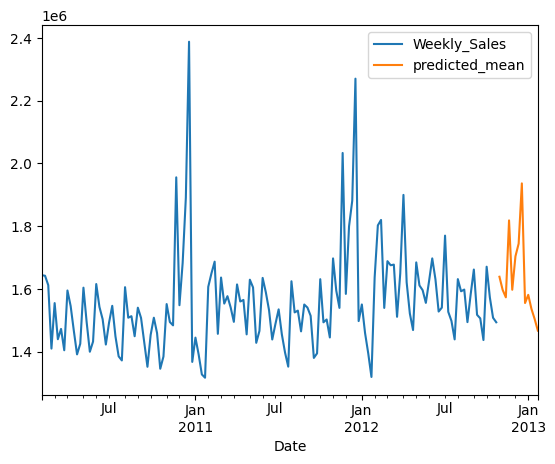

In [58]:
Store_1.plot()
pred_Sarima.plot()
plt.legend()
plt.show()

***The forecast sales are showing an increase in sales at the year end, which is in accordance with the observed seasonality. So store 1 should stock up its inventory to match the demand. However the predicted sales won't be that high as previous years so a moderate stocking of inventory can be done compared to previous years***

## For Store 20 (the highest selling store)

In [59]:
#extrating time series for the highest selling store 
Store_20 = tseries(data,20)
Store_20.head()

Weekly_Sales
Date                    
2010-02-05    2401395.47
2010-02-12    2109107.90
2010-02-19    2161549.76
2010-02-26    1898193.95
2010-03-05    2119213.72

C:\Users\Pritam\AppData\Local\Temp\ipykernel_28300\1308318146.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_k = kpss(df)


Both ADFuller and KPSS indicates store sales are stationary
ADFuller --->
(-5.39373869285483, 3.4912952838128377e-06, 4, 138, {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}, 3553.6598733693677)
KPSS --->
(0.09542216600395025, 0.1, 5, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


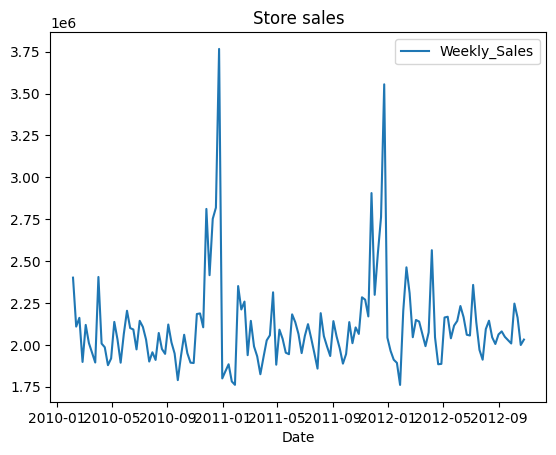

In [60]:
stationarytest(Store_20)

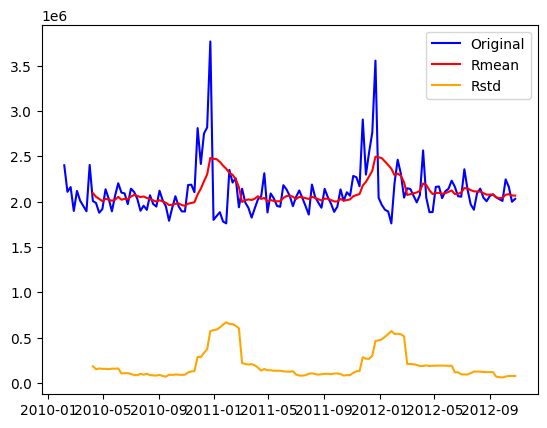

In [61]:
plot_rolling(Store_20,window=10)

***Statistical test indicate data to be stationary but the rolling mean plot indicates it to be not staionary***

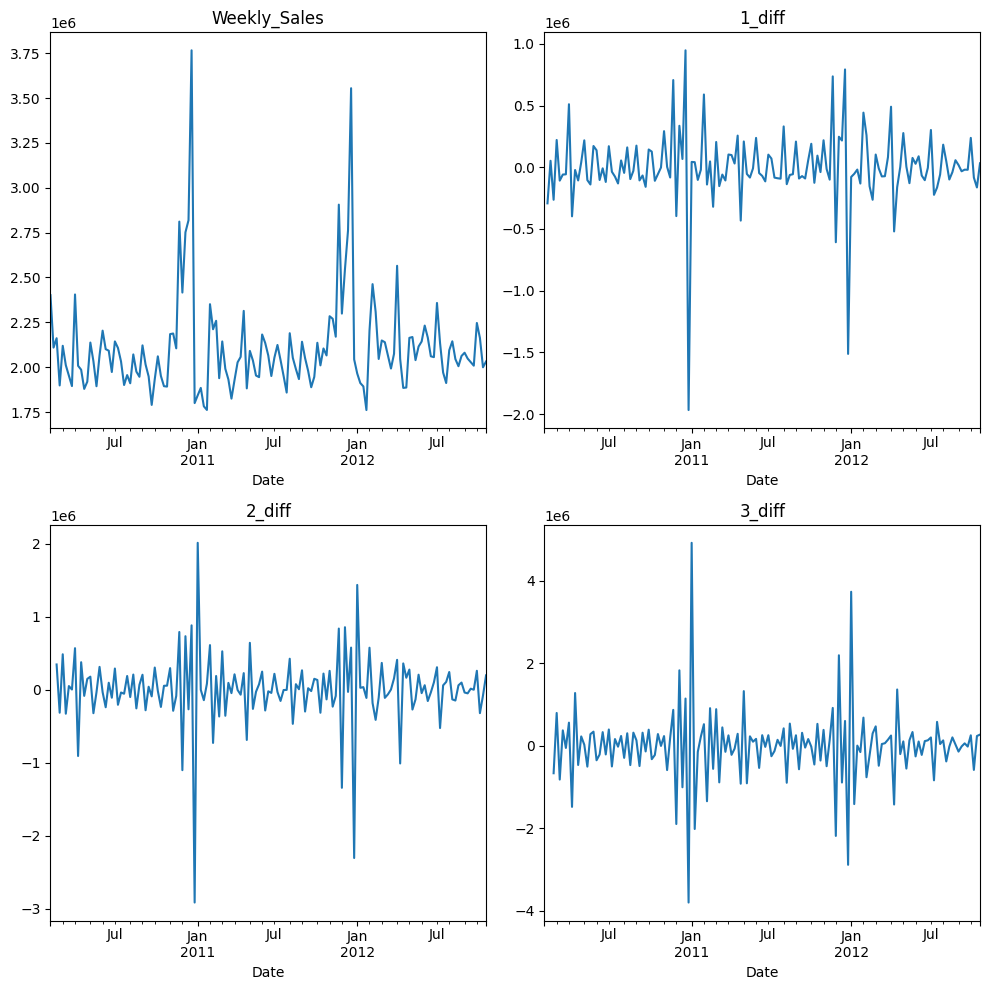

In [62]:
plot_difference(Store_20, n_diff=3)

***First difference looks stationary***

C:\Users\Pritam\AppData\Local\Temp\ipykernel_28300\1308318146.py:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result_k = kpss(df)


Both ADFuller and KPSS indicates store sales are stationary
ADFuller --->
(-7.772758394950501, 8.831131109476821e-12, 5, 136, {'1%': -3.4793722137854926, '5%': -2.8830370378332995, '10%': -2.578233635380623}, 3539.8364533873005)
KPSS --->
(0.18048197691663861, 0.1, 44, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})


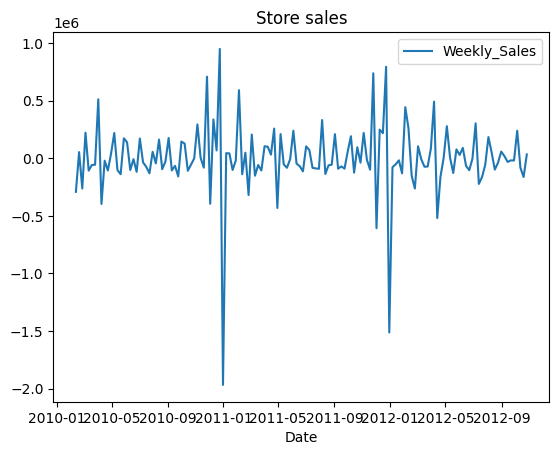

In [63]:
diff_1 = diff(Store_20, k_diff = 1)
stationarytest(diff_1)

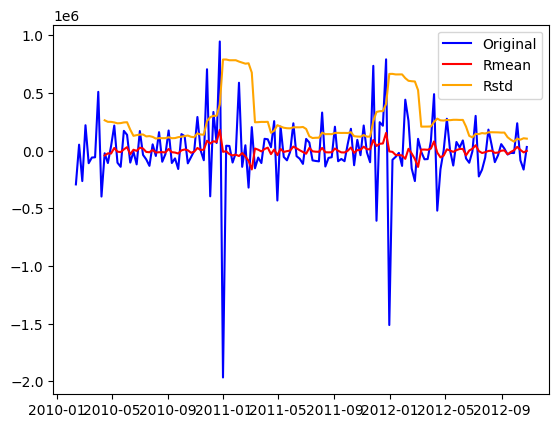

In [64]:
plot_rolling(diff_1, window = 10)

***Statistical test and rolling mean plot suggest first difference to be stationary. Hence d=1 for ARIMA and SARIMA model***

(<Figure size 640x480 with 1 Axes>, <Figure size 640x480 with 1 Axes>)

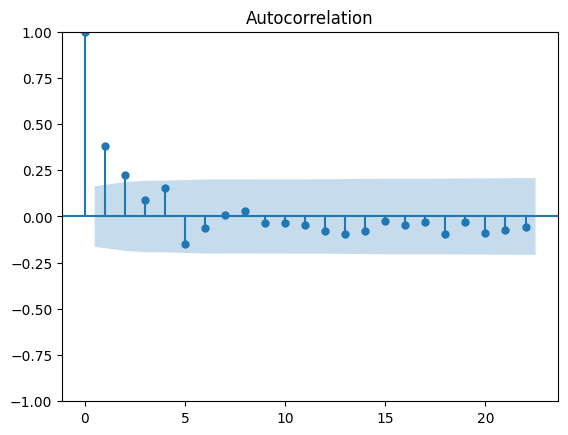

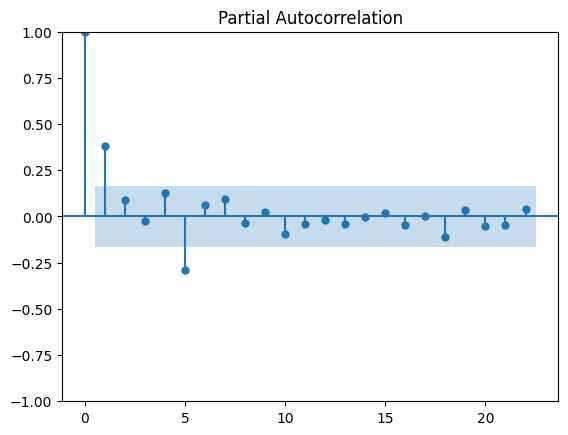

In [65]:
ACF_PACF(Store_20)

***There is a sudden drop in the ACF plot, with PACF plot having some significant value, which indicates this to be mostly an AR model***

***From the PACF plot, the value of p can start with 1 for ARIMA model***

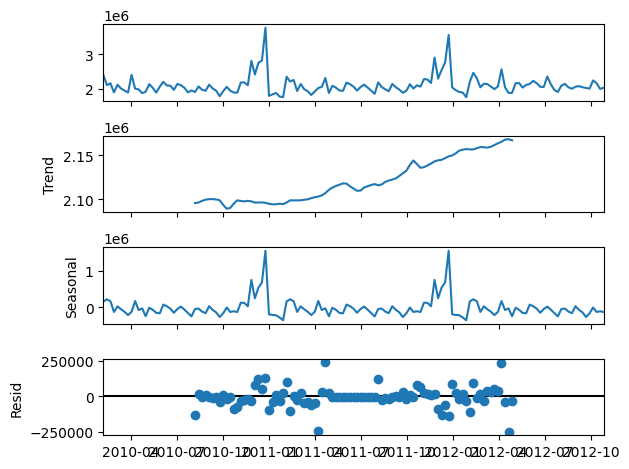

In [66]:
plot_decomp(Store_20)

***The sales have a general increasing trend. There is a presence of seasonality in the data, which we noticed before also. A seasonal ARIMA model would be better than a general ARIMA model***

### Time series modeling and forecasting

In [67]:
#spliting train and test data
train_20,test_20 = train_test(Store_20, split=110)

In [68]:
# applying ARIMA, SARIMA, Prophet to check the predictions of each model
# keeping d =1 for ARIMA and SARIMA
# m=52 as it is a weekly data

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3087.472, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3073.951, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3069.296, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3085.482, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3069.667, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3065.423, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3064.090, Time=0.11 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3065.720, Time=0.08 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3067.624, Time=0.09 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3066.146, Time=0.35 sec
 ARIMA(1,1,3)(0,0,0)[0]             : AIC=3062.413, T

19:15:22 - cmdstanpy - INFO - Chain [1] start processing
19:15:24 - cmdstanpy - INFO - Chain [1] done processing


Prophet model prediction generated


C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


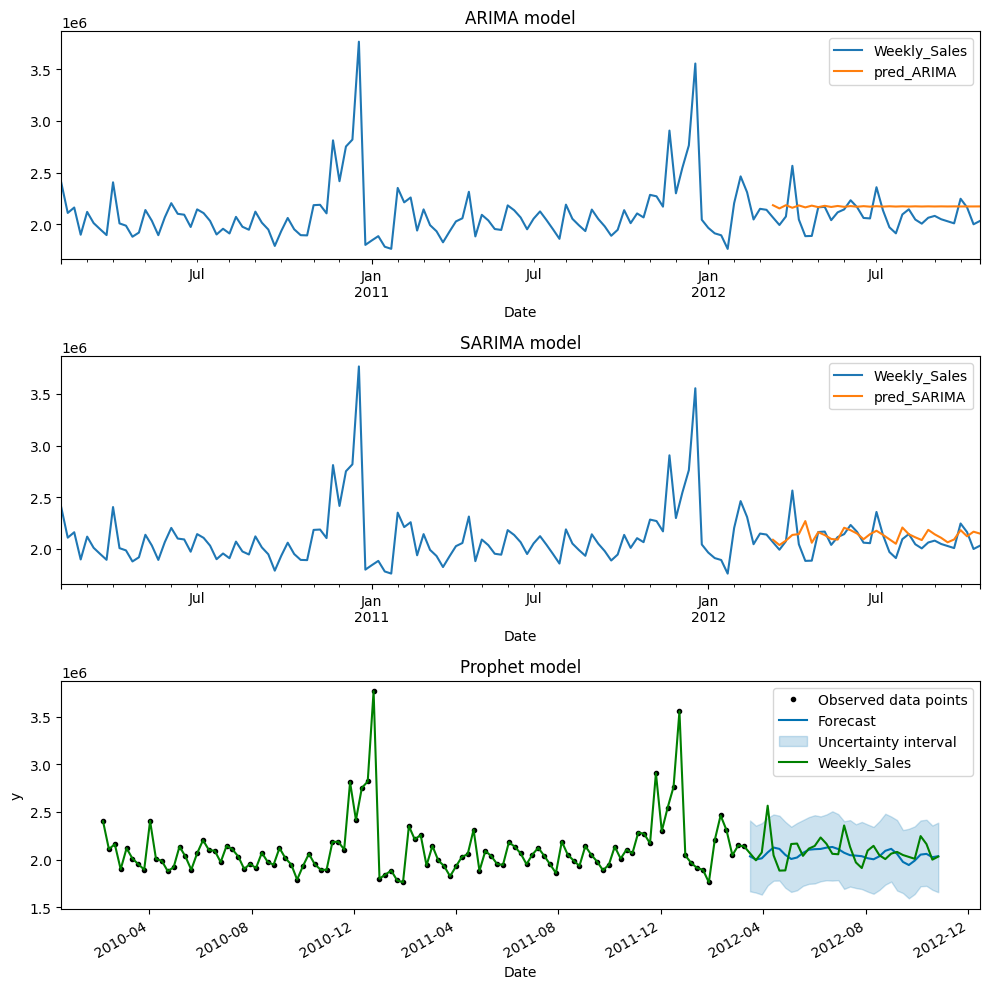

In [69]:
#checking model for accuracy
pred_values_20 = series_fit(Store_20, train_20, test_20, m = 52, d = 1, trace = True)

***From three models, SARIMA model seems to be generating best fitting curve. Hence using SARIMA to forecast sales of Store 20***

In [70]:
pred_values_20

Weekly_Sales    pred_ARIMA   pred_SARIMA  pred_Prophet
Date                                                              
2010-02-05    2401395.47           NaN           NaN           NaN
2010-02-12    2109107.90           NaN           NaN           NaN
2010-02-19    2161549.76           NaN           NaN           NaN
2010-02-26    1898193.95           NaN           NaN           NaN
2010-03-05    2119213.72           NaN           NaN           NaN
...                  ...           ...           ...           ...
2012-09-28    2008350.58  2.172467e+06  2.091601e+06  1.989299e+06
2012-10-05    2246411.89  2.171811e+06  2.182122e+06  2.052236e+06
2012-10-12    2162951.36  2.172381e+06  2.122199e+06  2.059795e+06
2012-10-19    1999363.49  2.171886e+06  2.167014e+06  2.025184e+06
2012-10-26    2031650.55  2.172316e+06  2.148521e+06  2.035553e+06

[143 rows x 4 columns]

### FINAL prediction

In [71]:
Sarima = SARIMAX(Store_20, order = (4,1,2), seasonal_order =(1,0,0,52)) #weekly data
model_Sarima = Sarima.fit()

C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible star

In [72]:
pred_Sarima = model_Sarima.predict(start = len(Store_20), end = len(Store_20) + 12, dydnamic = True )

C:\Users\Pritam\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dydnamic']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


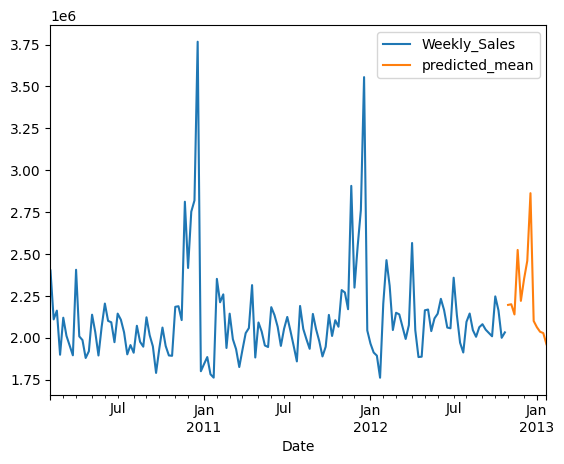

In [73]:
Store_20.plot()
pred_Sarima.plot()
plt.legend()
plt.show()

***The forecast sales are showing an increase in sales at the year end, which is in accordance with the observed seasonality. So store 20 should stock up its inventory to match the demand. However the predicted sales won't be that high as previous years so a moderate stocking of inventory can be done compared to previous years***